# DATA620 Final Project 
   Sentiment Analysis
   Krishna Rajan

# Video Presentation


# Twitter Sentiment Analysis about the COVID19 Crisis
The COVID19 has struck fear into the heart of the world, Every country in the world has had to endure this       pandemic and has brought life to a stand still. Millions of people have been bitten by the COVID bug and 100's of thousands of people have been killed by the bug while bringing economies of developed countries to its knees causing economic hardship to millions of people worldwide, the world will never be the same again.This project is dedicated to all thoses who have been directly and indirectly effected by this pandemic.This project tries to analyse the sentiments around the COVID pandemic

PATH = "/Users/rajans/Desktop/CUNY/Data620/FInal Project/"
Image(filename = PATH + "COVID.jpg", width=100, height=100)

# Twitter Data Pull
Process file for Twitter data pull: 
https://github.com/rajank17/Data620/blob/master/Final%20Project/Data%20620%20Final%20Project.ipynb
The COVID 19 started to become a Pandemic around first week of March 2020
The Twitter data pull notebook linked above has the code to retrieve data from Twitter since 03/1/2019 with the hashtags #COVID-19 OR #COVID19. The data retrieval specified 1000 tweets; Twitter returned 1000 rows.
The returned tweets were saved on a CSV file named "COVID19_Tweets_Raw.csv". This is the input file used for sentiment analysis.

# Sentiment Analysis
This project is going to perform sentiment analysis on approximately 1000 tweets that have the hashtag #COVID-19 OR #COVID19. The sentiment analysis is going to classify the text as positive, neutral, or negative.
For each sentiment class, we're going to analyze associated hashtags and location.
TextBlob is the package used to do the sentiment analysis: https://textblob.readthedocs.io/en/dev/

# Load Libraries

In [175]:
import pandas as pd
from textblob import TextBlob
import re 
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Load Tweets
These are the links to the saved Twitter data pull in CSV format.
The adjusted CSV file contains standardize location. The raw location values in the data pull were manually typed in by Twitter users, and they can enter whatever they want as their location. Most provided valid locations that either refer to a state in the United States or refer to a country that is not United States. If more than one location is present, the first location was selected. Because the data set is small (about 560 rows), the standardization was done by manually going through each location value in Excel and converting it to a standard format. When possible, US states were captured. More specific areas in other countries were not standardized.
Raw output from Twitter data pull:
https://github.com/rajank17/Data620/blob/master/Final%20Project/COVID19_Tweets_Raw.csv
Adjusted CSV file (cleaned location): 
https://github.com/rajank17/Data620/blob/master/Final%20Project/COVID19_Tweets_Clean.csv

In [179]:
tweets_df = pd.read_csv("/Users/rajans/Desktop/CUNY/Data 602/Data620/Final Project/COVID19_Tweets_Clean.csv")

In [181]:
tweets_df.shape

(1000, 8)

In [182]:
tweets_df.head(10)

,row_id,tweet_id,created_at,user,location,location_clean,location_type,text
0,0,'1263613281924595712,5/21/20 23:30,ToplessVegas,Las Vegas,Nevada,USA,"@chrislhayes Cuomo, Murphy, Walz, Whitmer, and Newsom are de facto euthanizing grandparents by requiring unprepared… https://t.co/K54Q2FRYFs"
1,1,'1263613280381263872,5/21/20 23:30,Adwoaadubianews,Ghana,Ghana,Rest Of the World,"Meet the 95-year-old veteran walking 14 miles to raise US$600,000 for COVID-19 charities https://t.co/63ssLbcLBm"
2,2,'1263613280242683904,5/21/20 23:30,roselarosillo,"Baja California, México",Mexico,Rest Of the World,#COVID19 da mucha sed https://t.co/C3ogGuBG1L
3,3,'1263613270574989312,5/21/20 23:30,GreenCleanLV,"Las Vegas, Nevada",Nevada,USA,https://t.co/18dsvdpAZf Architects design COVID-19 mobile testing labs for underserved communities #GreenClean
4,4,'1263613269086011393,5/21/20 23:30,RajaNomanjamwal,"Jammu, Jammu And Kashmir",India,Rest Of the World,"We are the only generation in human history to fight 3 pandemics together : TikTok, Covid 19 and stupidity."
5,5,'1263613268066734093,5/21/20 23:30,BreatheAgain777,"Texas, USA",Texas,USA,Well the blue states have more Adrenochrome addicts and child traffickers. Of course they are still locked down....… https://t.co/rwfI8N6cxz
6,6,'1263613267865415682,5/21/20 23:30,SonKing,Tampa Bay,Florida,USA,@SteveRustad1 Over 600 Doctors Road to Trump and asked him to end the COVID-19 lockdown. We don’t believe your fake… https://t.co/QlXPxQsubb
7,7,'1263613267773198336,5/21/20 23:30,newsfilterio,"New York, NY",New Mexico,USA,UPDATE 1-Brazil retail tycoon Diniz says local supermarkets were fast to adjust to COVID-19 $BRFS #coronavirus… https://t.co/AwD1zSvE2P
8,8,'1263613267106136064,5/21/20 23:30,katgjovik,"Bainbridge Island, WA USA",Washington,USA,This promises to be a lively conversation - @dkorten w/ @SandraWaddock aka @IntellectShaman re how economic and man… https://t.co/PYZ9Qfnx3P
9,9,'1263613266229555200,5/21/20 23:30,MurraySchwann,"Biggar,Saskatchewan, Canada",Canada,Rest Of the World,Gary Kohls MD: An Alternative Medical View on COVID-19


# Utility Functions
Below are functions for cleaning tweets (remove links and special characters) and for getting sentiment output for a tweet. 
Source: https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/

In [183]:
def clean_tweet(tweet_text):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet_text).split()) 

#classify sentiment of passed tweet using textblob's sentiment method 
def get_tweet_sentiment(tweet_text): 
        analysis = TextBlob(tweet_text) 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

def get_tweet_sentiment_polarity(tweet_text): 
         analysis = TextBlob(tweet_text)
         return analysis.polarity
        
#for plotting horizontal bar plots
def plot_location(data):
    ax = data.plot(kind='barh', x='location', y='count', alpha=0.8, figsize=(10, 12), 
                                   color='#86bf91', zorder=2, width=0.6, legend=0)
    #Source: https://mode.com/example-gallery/python_horizontal_bar/
    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # Switch off ticks
    ax.tick_params(axis="both", which="both", bottom=0, top=0, labelbottom=1, left=0, right=0, labelleft=1)

    #clear axis labels
    plt.xlabel('')
    plt.ylabel('')

# Sentiment Analysis of Cleaned Tweets
TextBlob is the package used to perform the sentiment analysis.
TextBlob is a Python (2 and 3) library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.
The function call TextBlob(tweet_text) returns a sentiment polarity score.
Sentiment polarity score > 0 evaluates to a positive sentiment
Sentiment polarity score = 0 evaluates to a neutral sentiment
Sentiment polarity score < 0 evalutes to a negative sentiment
Source: https://textblob.readthedocs.io/en/dev/_modules/textblob/blob.html

In [184]:
tweets_df['clean_text'] = tweets_df['text'].apply(clean_tweet)
tweets_df['sentiment'] = tweets_df['clean_text'].apply(get_tweet_sentiment)
tweets_df['sentiment_polarity'] = tweets_df['clean_text'].apply(get_tweet_sentiment_polarity)

In [185]:
tweets_by_type = tweets_df.groupby(['sentiment'])['tweet_id'].count()

In [186]:
tweets_by_type

sentiment
negative    174
neutral     437
positive    389
Name: tweet_id, dtype: int64

# Sentiment Result
As anticipated, most of the tweets are positive or neutral. Only 6% of the tweets are negative.
Positive: 39%
Neutral: 44%
Negative: 17%

In [187]:
positive_count = tweets_by_type['positive']
negative_count = tweets_by_type['negative']
neutral_count = tweets_by_type['neutral']
size = len(tweets_df.index)

In [188]:
print("Positive: " + "{0:.0f}%".format(positive_count/size * 100))
print("Neutral: " + "{0:.0f}%".format(neutral_count/size * 100))
print("Negative: " + "{0:.0f}%".format(negative_count/size * 100))

Positive: 39%
Neutral: 44%
Negative: 17%


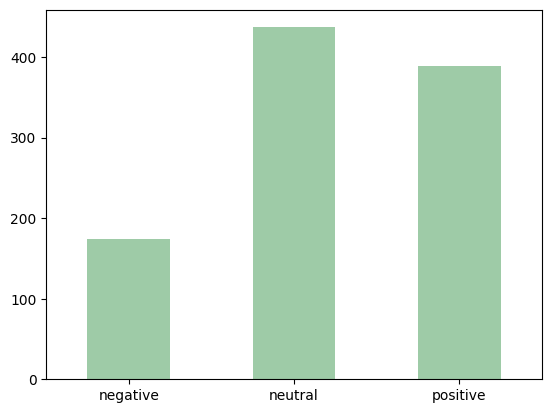

In [189]:
tweets_by_type.plot(kind='bar', alpha=0.8, rot=0, color='#86bf91')
plt.xlabel('')
plt.show()

In [190]:
negative_tweets = tweets_df.loc[tweets_df['sentiment'] == 'negative']['clean_text']
pd.set_option('display.max_colwidth', -1)
negative_tweets.sample(10).reset_index(drop=True)

/Users/rajans/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


0    Trump endorsing hydroxychloroquine to ward off COVID-19 offers a stark lesson in how science social media politi   
1    Looks like the military is just now starting to test our soldiers over in Poland for covid19.                      
2    You need MFA to log into Facebook yet Washington state loses hundreds of millions of dollars in fake unemployment c
3    Fuck Covid-19 My allergies have been beating my ass for the past 3 days 😩                                          
4    How incredibly selfish and idiotic can you be causing worry and financial distress for your neighbors A 67 year old
5    An odd feature for scmp to print Their crew is usually looking for stories to drag CN.                             
6    “A prudent person foresees danger and takes precautions The simpleton goes blindly on and suffers                  
7    Too little too late In my town the flags have been at half mast for at least a month in memory of                  
8    Stupid people and stupid pu

In [191]:
positive_tweets = tweets_df.loc[tweets_df['sentiment'] == 'positive']['clean_text']
positive_tweets.sample(10).reset_index(drop=True)

0    Quite excited to present this to the world thank you for your support and dedication to amplify                   
1    Island Records One Love COVID-19 Relief Auction raised £179,755 today thanks in part to Bono's autographed handw  
2    Join _Ideas for a special panel discussion on #geopolitics in a #post-pandemic world on 2 June register now       
3    Evolution of number of cases for Djibouti with a total confirmed of 1,828                                         
4    All I need to do is carry a mask What a relief Thanks ! #Covid_19 #COVID                                          
5    Canton City Public Health is now monitoring outbreaks of COVID-19 at meat processors Case Farms and Fresh Mark whi
6    Agus and her husband Wiki are two creatives that moved to Santa Cruz last year Like many people ..                
7    “Right now we started spiking again this week We’re at our highest level since the pandemic began.                
8    Please see today's #COVID19ON updat

In [192]:
neutral_tweets = tweets_df.loc[tweets_df['sentiment'] == 'neutral']['clean_text']
neutral_tweets.sample(10)

597    Why Some Minnesota Events Can't Cancel Despite COVID-19—and What We Can Do about It                                
993    If your going to open dentist offices why can’t you open beauty salons You get the virus through breathing not you 
528    when you find out China has a virology lab in Wuhan where the COVID-19 outbreak began                              
903    Minks may have infected humans novel coronavirus Dutch government.... | #Mink #Netherlands #Dutch #Coronavirus     
668    Japan Cambodia,Thailand,covid19 final episode on way                                                               
261    Here we go... #ItIs1984 #RayBradbury #Orwellian                                                                    
906    March 2020 Dr Anthony Fauci talks with Dr Jon LaPook about Covid-19 via                                            
17     Dummy in a mask...                                                                                                 
899    Libertari

# Reviewing the Tweets
Because the nature of the subject , I anticipated that most of the tweets would be Negative or netural. So when the results came in, we were very interested in looking at the tweets with positive sentiments. Some of the results sound more neutral and some may contain some negative keywords but the meaning is not necessarily negative.
Positive tweets
39% of the tweets resulted in a Positive sentiment. Below you will see a random sample of 10 tweets with positive sentiments.
Did you miss our last webinar Here are our top 3 tips for building a new norm Are you struggling to create a post  
1    I know Dr Nelson by reputation because one of his successful early heart surgeries saved the life of my grand-unke 
2    _Trump20 88 Significant risk for COVID-19.                                                                         
3    Just watched the interview with Professor Sunetra Gupta at Highly recommended🙏 #covid19                            
4    Odigo clients have been able to harness our #cloud #ccaas during #COVID19 to support #remoteworking Odigo teams ar 
5    Feel Good Friday....If you need a pick me up read this beautiful letter To see more heart warming letters visit th 
6    Trump ‘I Tested Very Positively for COVID-19 via                                                                   
7    Sweet surprise for Maggie today when her Cherokee County Special Olympics Track Coaches came by to visit from a dis
8    New charter co-locations are a public health threat to students and families Co-locations will cause overcrowding, 
9    I donated to the a rapid response fund to support Greater #Philadelphia #nonprofits at the frontli                 
Name: clean_text, dtype: object

# Tweets by Location
Twitter API allows us to pull user location of the tweets. These are location typed in by the users themselves. Because the data set is small, we were able to manage to clean up the location into a standardized format. We also classified the location as United States or Other.
United States: 44%
Rest Of the World: 23%
Unknown: 33%

In [193]:
tweets_by_location = tweets_df.groupby(['location_type'])['tweet_id'].count()

In [194]:
tweets_by_location.sort_values()

location_type
Rest Of the World    231
Unknown              332
USA                  437
Name: tweet_id, dtype: int64

In [195]:
other_count = tweets_by_location['Rest Of the World']
unknown_count = tweets_by_location['Unknown']
unitedStates_count = tweets_by_location['USA']

print("United States: " + "{0:.0f}%".format(unitedStates_count/size * 100))
print("Rest Of the World: " + "{0:.0f}%".format(other_count/size * 100))
print("Unknown: " + "{0:.0f}%".format(unknown_count/size * 100))

United States: 44%
Rest Of the World: 23%
Unknown: 33%


# Tweets by United States and Other Countries
Majority of the tweets are from United States.

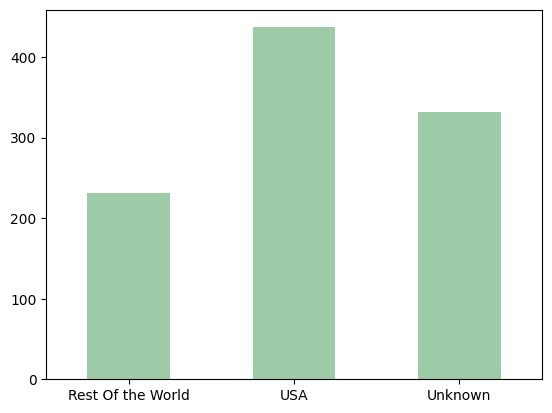

In [196]:
tweets_by_location.plot(kind='bar', alpha=0.8, rot=0, color='#86bf91')
plt.xlabel('')
plt.show()

In [197]:
# The code below creates two data frames. One for tweets with United States as their user location, and another for tweets with user location from other countries. Unkown locations are excluded.

In [198]:
tweets_USA = tweets_df[tweets_df['location_type'] == 'USA']
tweets_Other = tweets_df[tweets_df['location_type'] == 'Rest Of the World']

tweets_USA = tweets_USA.groupby(['location_clean'])['tweet_id'].count().to_frame()
tweets_USA = tweets_USA.reset_index(drop=False)
tweets_USA.columns = ['location', 'count']
tweets_USA = tweets_USA[tweets_USA['location'] != 'Unknown']
tweets_USA = tweets_USA.sort_values(by="count", ascending=True)
tweets_USA = tweets_USA.reset_index(drop=True)

tweets_Other = tweets_Other.groupby(['location_clean'])['tweet_id'].count().to_frame()
tweets_Other = tweets_Other.reset_index(drop=False)
tweets_Other.columns = ['location', 'count']
tweets_Other = tweets_Other[tweets_Other['location'] != 'Unknown']
tweets_Other = tweets_Other.sort_values(by="count", ascending=True)
tweets_Other = tweets_Other.reset_index(drop=True)

Tweets from United States
It's not a suprise that most of the tweets from the United States are from California (!80 tweets). We somewhat expected for New York to be on the top three; Kansas and Arkansas round up the states with lowest tweets

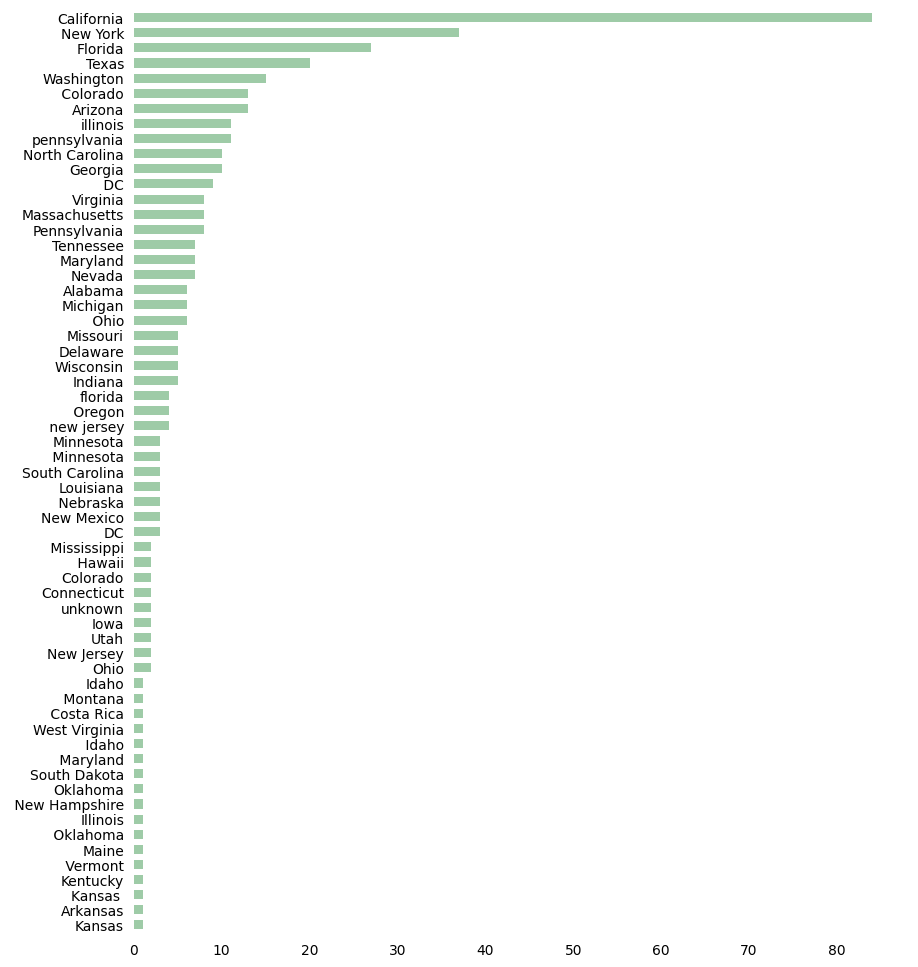

In [199]:
plot_location(tweets_USA)

Tweets from Other Countries
The number one spot goes to Canada with 70 tweets. Australia & UK take up the other 2 spots in the top 3.

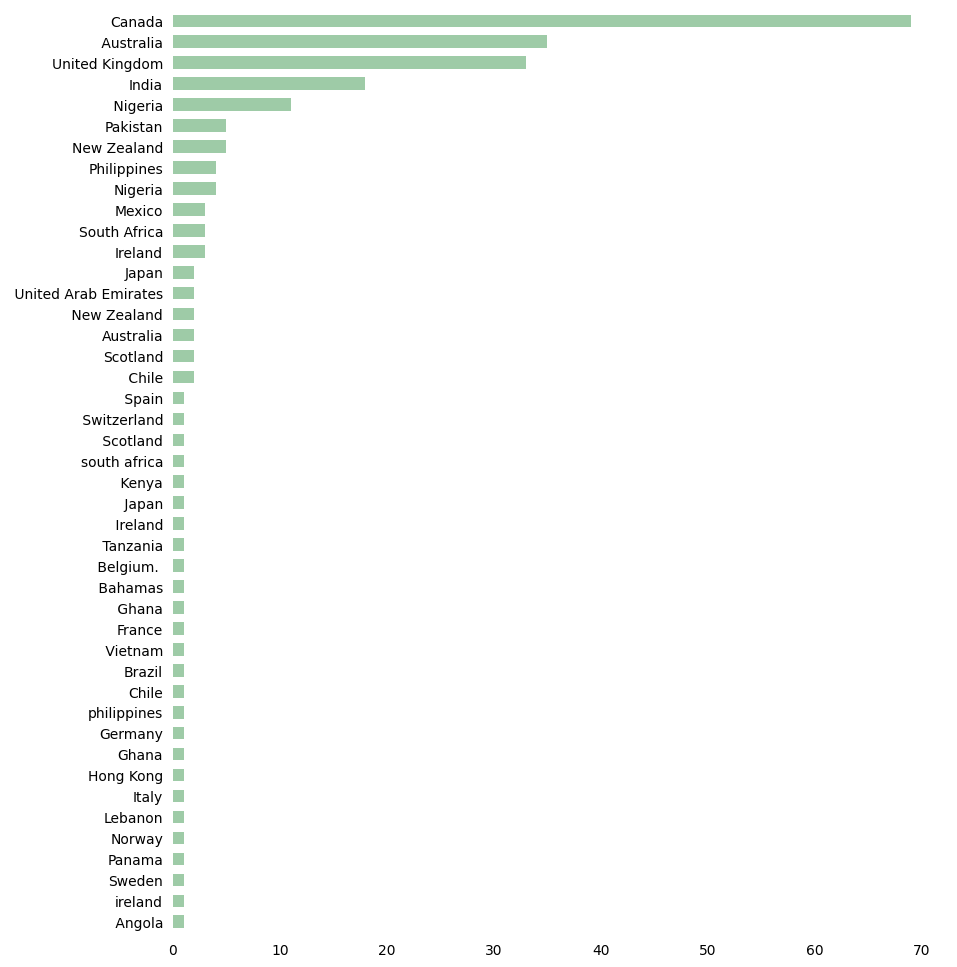

In [200]:
plot_location(tweets_Other)

Tweet Sentiment by Location
Below is a plot of of each sentiment broken down by United States and Other Countries. 
As expected, majority of the tweets in each sentiment category are from United States.

In [201]:
tweets_by_location_sentiment = tweets_df.groupby(['sentiment', 'location_type'])['tweet_id'].count()
tweets_by_location_sentiment

sentiment  location_type    
negative   Rest Of the World    34 
           USA                  83 
           Unknown              57 
neutral    Rest Of the World    98 
           USA                  184
           Unknown              155
positive   Rest Of the World    99 
           USA                  170
           Unknown              120
Name: tweet_id, dtype: int64

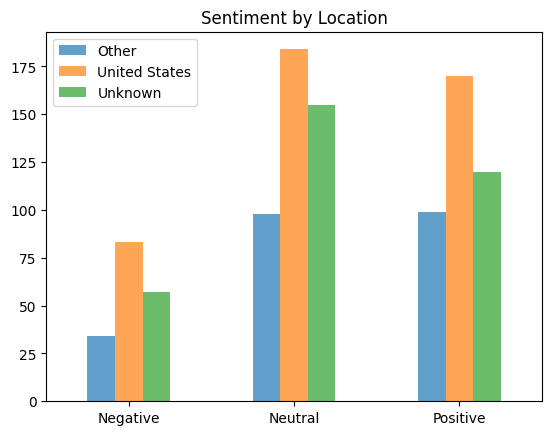

In [202]:
#https://stackoverflow.com/questions/47796264/function-to-create-grouped-bar-plot
df = pd.DataFrame([['Positive','United States',170],['Positive','Other', 99],['Positive','Unknown',120],
                   ['Neutral','United States',184],['Neutral','Other',98],['Neutral','Unknown',155],
                   ['Negative','United States',83],['Negative','Other',34],['Negative','Unknown',57]
                  ],
                  columns=['group','column','val'])
ax = df.pivot("group", "column", "val").plot(kind='bar', title="Sentiment by Location", rot=0, alpha=0.7)
plt.legend()
plt.xlabel('')
plt.show()

Location of Tweets with Positive Sentiment
Below is a closer look at user locations of tweets with positive sentiments.Ignoring Unknown It's not surprising that Canada takes the lead on this. 
States in the United States with at most positive tweet are California, Washington & Florida.
Other countries with at good list of positive tweets are Australia & United Kingdom

In [204]:
tweets_positive = tweets_df[tweets_df['sentiment'] == 'positive']
tweets_positive = tweets_positive.groupby(['location_clean'])['tweet_id'].count().to_frame()
tweets_positive = tweets_positive.reset_index(drop=False)
tweets_positive.columns = ['location', 'count']
tweets_positive = tweets_positive[tweets_positive['location'] != 'unknown']
tweets_positive = tweets_positive.sort_values(by="count", ascending=True)
tweets_positive = tweets_positive.reset_index(drop=True)

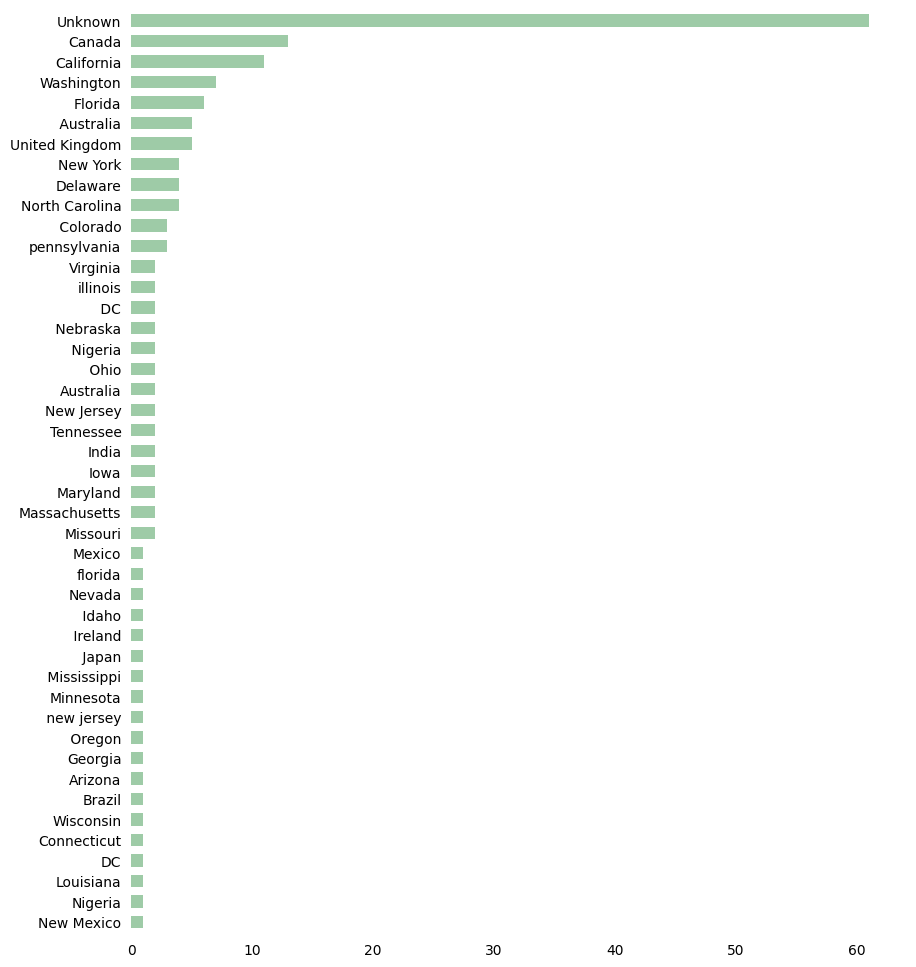

In [169]:
plot_location(tweets_positive)

I set out on this project thinking i will find whole lot of negative and neutral tweets comapred to positive tweets regarding the COVID virus, but it turns out that the tweets have been more postive than negative, tells us tha tpeople are more well equipped to deal with this pandemic compared to prevous pandemics.